In [9]:
import pandas as pd 
df=pd.read_csv("c:/data/iris/iris2.csv")
df.head()

,Sepallength,Sepalwidth,Petallength,Petalwidth,Name,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [10]:
df2=df.drop(df.index[range(40)])

In [11]:
df2.columns

Index(['Sepallength', 'Sepalwidth', 'Petallength', 'Petalwidth', 'Name',
       'Species'],
      dtype='object')

In [22]:
cols=['Sepallength', 'Sepalwidth', 'Petallength', 'Petalwidth']
X=df2[cols]
y=df2['Species']

In [23]:
df2.Species.value_counts()

1    50
2    50
0    10
Name: Species, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'iris\n (0: setosa, 1: versicolor, 2: virginica)')

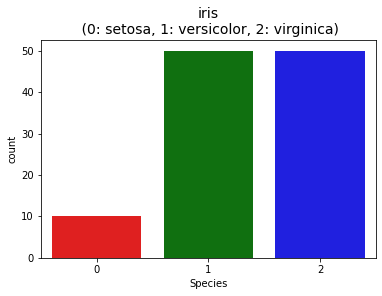

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

colors=["red", "green","blue"]

sns.countplot('Species', data=df2, palette=colors)
plt.title('iris\n (0: setosa, 1: versicolor, 2: virginica)', fontsize=14)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
y_train.value_counts()

1    40
2    40
0     8
Name: Species, dtype: int64

In [26]:
from sklearn.linear_model import LogisticRegression
logit1=LogisticRegression(random_state=0)
logit2=LogisticRegression(random_state=0,class_weight='balanced')
logit3=LogisticRegression(random_state=0, class_weight={0:3,1:1,2:2})

In [27]:
import numpy as np
print(np.bincount(y))
print(88/(3*np.bincount(y)))

[10 50 50]
[2.93333333 0.58666667 0.58666667]


In [28]:
for logit in [logit1,logit2,logit3]:
    logit.fit(X_train, y_train) 
    print(logit)
    print("학습용:",logit.score(X_train, y_train)) 
    print("검증용:",logit.score(X_test, y_test)) 
    print()


LogisticRegression(random_state=0)
학습용: 0.9545454545454546
검증용: 1.0

LogisticRegression(class_weight='balanced', random_state=0)
학습용: 0.9545454545454546
검증용: 1.0

LogisticRegression(class_weight={0: 3, 1: 1, 2: 2}, random_state=0)
학습용: 0.9545454545454546
검증용: 1.0

